https://www.cs.toronto.edu/~kriz/cifar.html  
same data and format with torchvision.datasets.CIFAR10()  
download and unzip CIFAR-10 python version

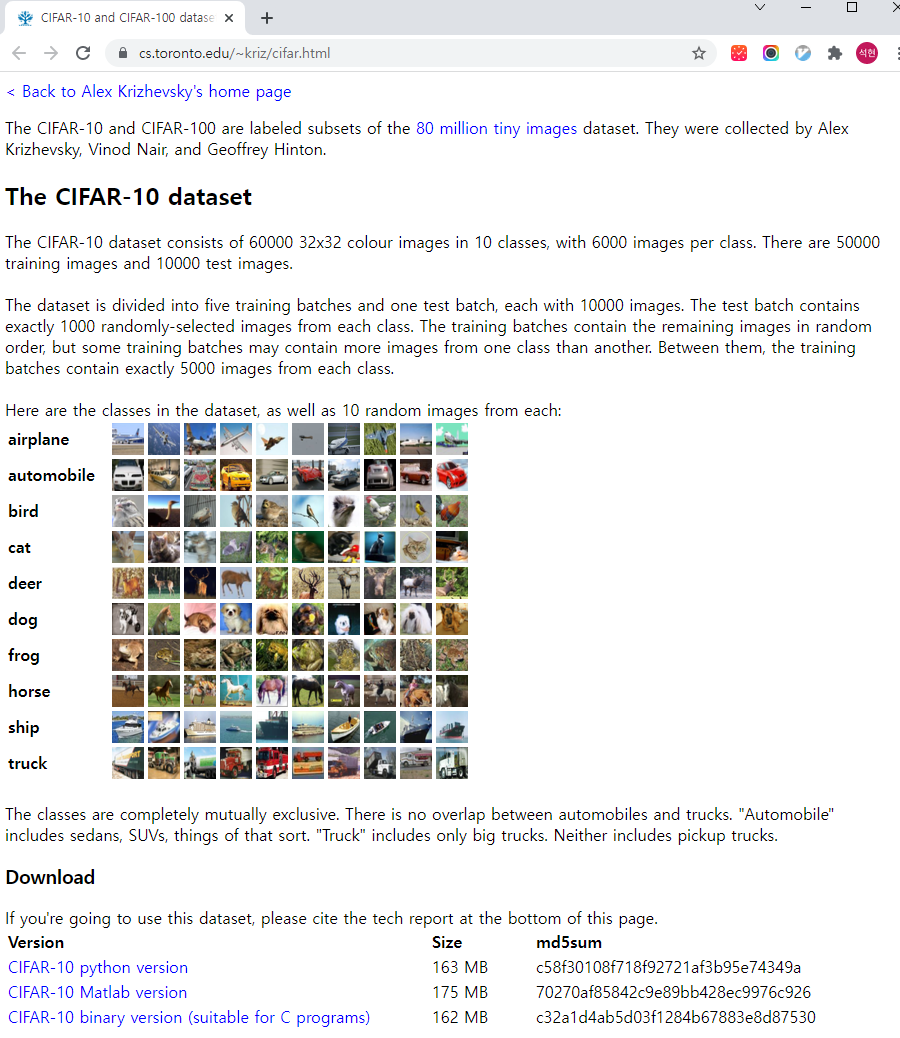

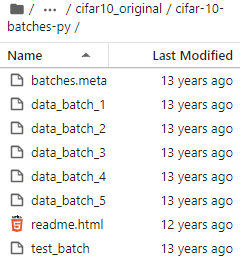

In [1]:
import numpy as np
import os
import pickle

import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
train_base = '/home/jovyan/bj/dataset/cifar10_original/cifar-10-batches-py/data_batch_'
test_path = '/home/jovyan/bj/dataset/cifar10_original/cifar-10-batches-py/test_batch'

In [3]:
png_output_dir = '/home/jovyan/bj/dataset/cifar10_original_png'
png_train_dir = f'{png_output_dir}/train'
png_test_dir = f'{png_output_dir}/test'

class_name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_id_name_dict = dict()
for idx, name in enumerate(class_name_list):
    class_id_name_dict.update({idx:name})
    os.makedirs(f'{png_train_dir}/{name}', exist_ok=True)
    os.makedirs(f'{png_test_dir}/{name}', exist_ok=True)
    
display(class_id_name_dict)

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [4]:
def load_dataset(path):
    with open(path, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')

    label = batch[b'labels']
    data = batch[b'data']

    return label, data

In [5]:
test_label, test_data = load_dataset(test_path)
display(np.unique(test_label, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [6]:
train_label = np.empty([0])
train_data = np.empty([0, 32 * 32 * 3])

for i in range(1, 6):
    batch_path = f'{train_base}{i}'
    batch_label, batch_data = load_dataset(batch_path)
    
    train_label = np.concatenate((train_label, batch_label), axis=0)
    train_data = np.concatenate((train_data, batch_data), axis=0)

display(np.unique(train_label, return_counts = True))

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [7]:
def save_png(label, data, path, class_id_name_dict):
    total_counts = len(label)
    for idx, val in enumerate(label):
        sample_image = data[idx,:].reshape((3, 32, 32)).astype('uint8').transpose(1, 2, 0)
        sample_image = cv2.cvtColor(sample_image, cv2.COLOR_RGB2BGR)
        sample_name = f'{idx:05}.png'
        cv2.imwrite(f'{path}/{class_id_name_dict[val]}/{sample_name}', sample_image)
        
        count = idx + 1
        if count % 100 == 0:
            clear_output(wait=True)
            print(f'{count}/{total_counts}')

In [8]:
save_png(test_label, test_data, png_test_dir, class_id_name_dict)

10000/10000


In [9]:
save_png(train_label, train_data, png_train_dir, class_id_name_dict)

50000/50000


In [10]:
def show_sample_image(idx, label, data):
    sample_image = data[idx,:].reshape((3, 32, 32)).astype('uint8').transpose(1, 2, 0)
    print(class_id_name_dict[label[idx]])
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.imshow(sample_image)
    plt.show()

airplane


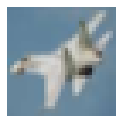

In [11]:
show_sample_image(10, test_label, test_data)